In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/Users/raphaelseo/Documents/study/fastcampus/바이트디그리/1번과제/데이터셋/데이터분석 Expert _ HR 데이터.csv')

In [3]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## 데이터 컬럼설명
- Age : 해당 직원의 나이
- Attrition : 퇴직 여부
- BusinessTravel : 출장의 빈도
- DailyRate : 일 대비 급여의 수준
- Department : 업무분야
- DistanceFromHome : 집과의 거리
- Education : 교육의 정도
- EducationField : 전공
- EmployeeCount : 직원 숫자
- EmployeeNumber : 직원 ID
- EnvironmentSatisfaction : 업무 환경에 대한 만족
- Gender : 성별
- HourlyRate : 시간 대비 급여의 수준
- JobInvolvement : 업무 참여도
- JobLevel : 업무의 수준
- JobRole : 업무 종류
- JobSatisfaction : 업무 만족도
- MaritalStatus : 결혼 여부
- MonthlyIncome : 월 소득
- MonthlyRate : 월 대비 급여 수준
- NumCompaniesWorked : 일한 회사의 수
- Over18 : 18세 이상
- OverTime : 규정외 노동시간
- PercentSalaryHike : 급여의 증가분 백분율
- PerformanceRating : 업무 성과
- RelationshipSatisfaction : 대인관계 만족도
- StandardHours : 표준 시간
- StockOptionLevel : 스탁옵션 정도
- TotalWorkingYears : 경력 기간
- TrainingTimesLastYear : 교육 시간
- WorkLifeBalance : 일과 생활의 균형 정도
- YearsAtCompany : 근속 연수
- YearsInCurrentRole : 현재 역할의 년수
- YearsSinceLastPromotion : 마지막 프로모션
- YearsWithCurrManager : 현재 관리자와 함께 보낸 시간

In [4]:
num_columns = data.select_dtypes(include=np.number).columns.tolist()
cat_columns = data.select_dtypes(exclude=np.number).columns.tolist()

In [5]:
print(num_columns)
print(cat_columns)

['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


### 데이터 전처리
- 우선적으로 상관관계를 분석하기 위해서 가능한 범주형 데이터를 숫자형 데이터로 변환
  - 값의 순서가 있거나 Yes or No로 되어 있는 데이터들을 변환
- EmployeeCount, StandardHours, Over18 3개의 컬럼의 경우에는 모든 데이터가 동일한 값을 갖고 있으므로 분석이 불가능하여 제외

In [6]:
print(data['EmployeeCount'].unique())
print(data['StandardHours'].unique())
print(data['Over18'].unique())

[1]
[80]
['Y']


In [7]:
# 아래의 3개 컬럼의 경우에는 모든 데이터가 동일한 값을 갖고 있으므로 분석이 불가능하여 제외
exclude_columns = ['EmployeeCount', 'StandardHours', 'Over18']

In [8]:
gender_dic = {'Male':0, 'Female':1}
data['Gender'] = data['Gender'].map(gender_dic)

In [9]:
attr_dic = {'Yes':1, 'No':0}
data['Attrition'] = data['Attrition'].map(attr_dic)

In [10]:
bt_dic = {'Non-Travel':0, 'Travel_Rarely':1, 'Travel_Frequently':2}
data['BusinessTravel'] = data['BusinessTravel'].map(bt_dic)

In [11]:
ot_dic = {'Yes':1, 'No':0}
data['OverTime'] = data['OverTime'].map(ot_dic)

### 과제 1-1

구성원의 업무 성과별 다음 요인의 특징을 표와 그래프로 정리해주세요.

1) 경력기간(TotalWorkingYears) : 예) 업무 성과가 낮은 사람의 경력기간을 추출하여 특징을 그래프로 표현

2) 일과 생활의 균형 정도(WorkLifeBalance) : 예) 업무 성과가 낮은 사람의 일과 생활의 균형 정도를 추출하여 특징을 그래프로 표현

3) 마지막 승진(YearsSinceLastPromotion) : 예) 업무 성과가 낮은 사람의 마지막 승진과의 관련성을 추출하여 그래프로 표현

4) 규정외 노동시간(Overtime) : 예) 업무 성과가 낮은 사람의 초과근무 특징을 추출하여 그래프로 표현

5) 스톡옵션 정도(StockOptionLevel) : 예) 업무 성과가 낮은 사람의 스톡옵션과의 연관성을 추출하여 그래프로 표현

In [12]:
target_columns = ['TotalWorkingYears', 'WorkLifeBalance', 'YearsSinceLastPromotion', 'OverTime', 'StockOptionLevel']

### 시각화 및 결과
- Bar Plot을 통해서 상관관계 값을 비교
- Bar Plot을 통해서 업무 능률이 비교적 좋은 사람들과 아닌 사람들의 평균값을 비교
- 히스토그램을 통해서 두 집단간의 분포를 비교
- 아래의 결과를 확인해본 결과 YearsSinceLastPromotion을 제외하고는 큰 차이를 보여주지 않음
- YearSinceLastPromotion의 경우 평균 마지막 승진시기가 더 오래되었고, 데이터를 확인해본 결과 비교적 오래된 마지막 승진시기의 비율이 높았음
- 더불어 YearSinceLastPromotion의 상관관계 값이 가장 높게 측정됨

In [13]:
print(data['PerformanceRating'].unique())

[3 4]


In [14]:
corr_matrix = data[target_columns + ['PerformanceRating']].corr()

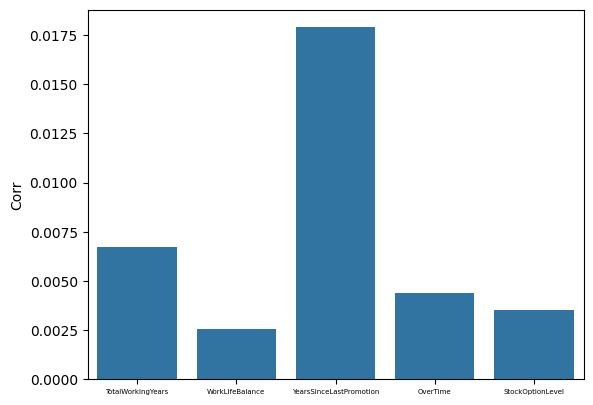

In [15]:
sns.barplot(corr_matrix['PerformanceRating'][:-1])
plt.xticks(fontsize=5)
plt.ylabel('Corr')
plt.show()

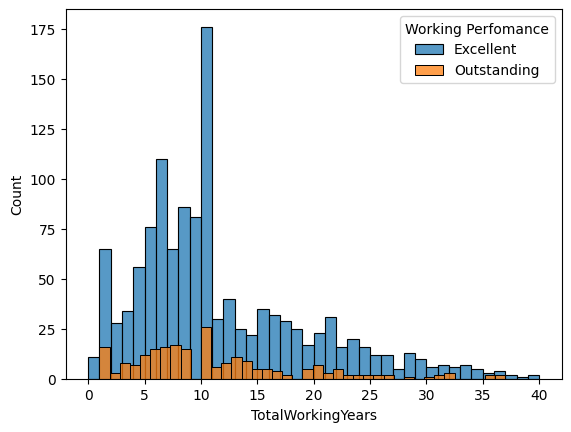

In [16]:
sns.histplot(data=data[data['PerformanceRating']==3], x='TotalWorkingYears', bins=40, label='Excellent')
sns.histplot(data=data[data['PerformanceRating']==4], x='TotalWorkingYears', bins=40, label='Outstanding')
plt.legend(title="Working Perfomance")
plt.show()

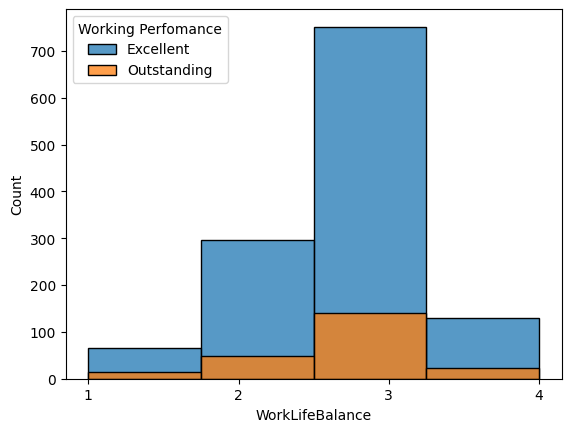

In [17]:
sns.histplot(data=data[data['PerformanceRating']==3], x='WorkLifeBalance', bins=4, label='Excellent')
sns.histplot(data=data[data['PerformanceRating']==4], x='WorkLifeBalance', bins=4, label='Outstanding')
plt.legend(title="Working Perfomance")
plt.xticks(range(1,5))
plt.show()

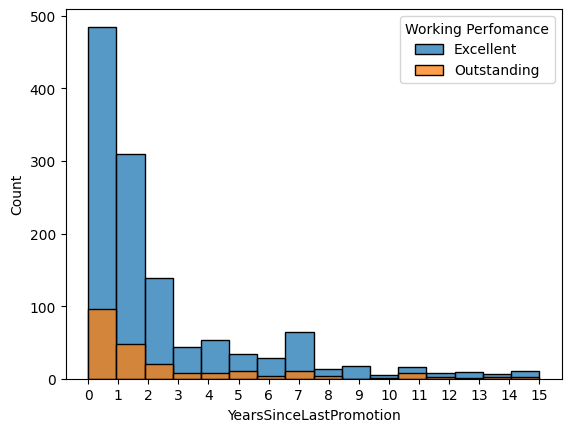

In [19]:
sns.histplot(data=data[data['PerformanceRating']==3], x='YearsSinceLastPromotion', bins=16, label='Excellent')
sns.histplot(data=data[data['PerformanceRating']==4], x='YearsSinceLastPromotion', bins=16, label='Outstanding')
plt.legend(title="Working Perfomance")
plt.xticks(range(16))
plt.show()

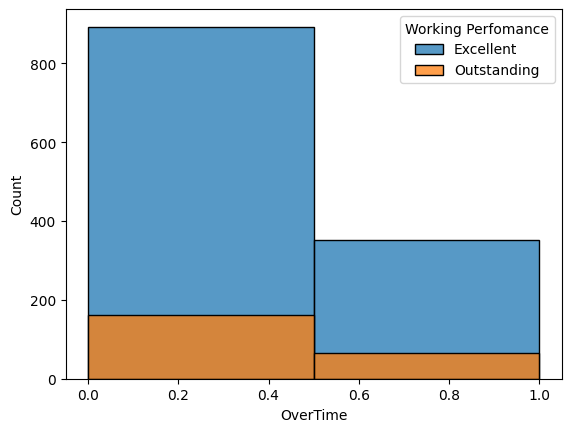

In [20]:
sns.histplot(data=data[data['PerformanceRating']==3], x='OverTime', bins=2, label='Excellent')
sns.histplot(data=data[data['PerformanceRating']==4], x='OverTime', bins=2, label='Outstanding')
plt.legend(title="Working Perfomance")
plt.show()

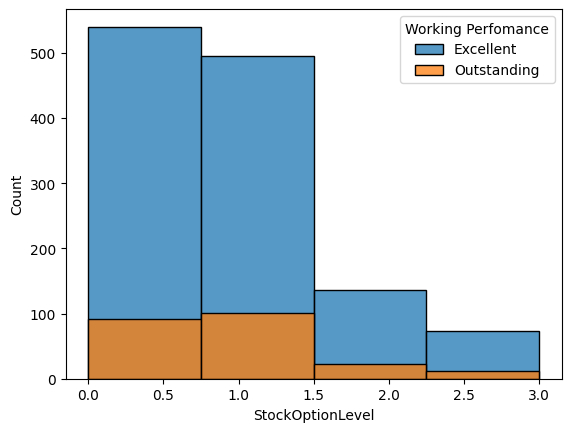

In [49]:
sns.histplot(data=data[data['PerformanceRating']==3], x='StockOptionLevel', bins=4, label='Excellent')
sns.histplot(data=data[data['PerformanceRating']==4], x='StockOptionLevel', bins=4, label='Outstanding')
plt.legend(title="Working Perfomance")
plt.show()

In [21]:
long_ago = len(data[(data['PerformanceRating']==3) & (data['YearsSinceLastPromotion'] >= 10)])/len(data[data['PerformanceRating']==3])
print(f'퍼포먼스가 비교적 낮은 사람중 승진한지 10년 이상된 사람의 비율은 {round(long_ago, 3) * 100}% 입니다.')

퍼포먼스가 비교적 낮은 사람중 승진한지 10년 이상된 사람의 비율은 4.5% 입니다.


In [22]:
long_ago = len(data[(data['PerformanceRating']==4) & (data['YearsSinceLastPromotion'] >= 10)])/len(data[data['PerformanceRating']==4])
print(f'퍼포먼스가 비교적 높은 사람중 승진한지 10년 이상된 사람의 비율은 {round(long_ago, 3) * 100}% 입니다.')

퍼포먼스가 비교적 높은 사람중 승진한지 10년 이상된 사람의 비율은 7.1% 입니다.


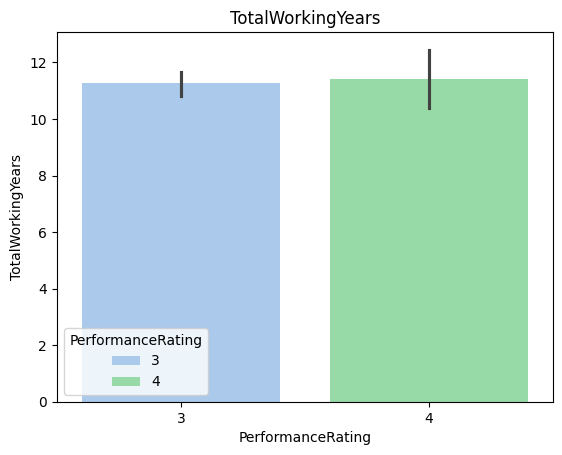

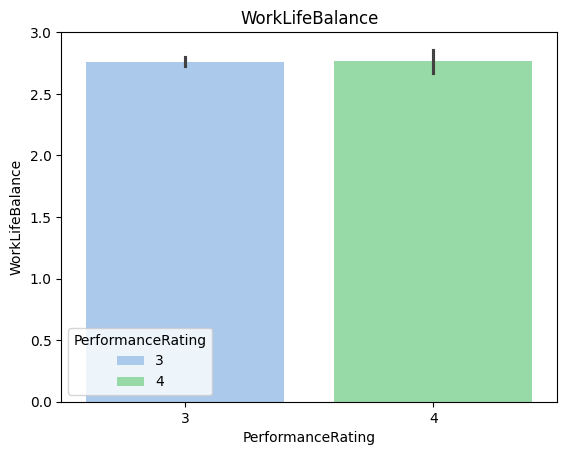

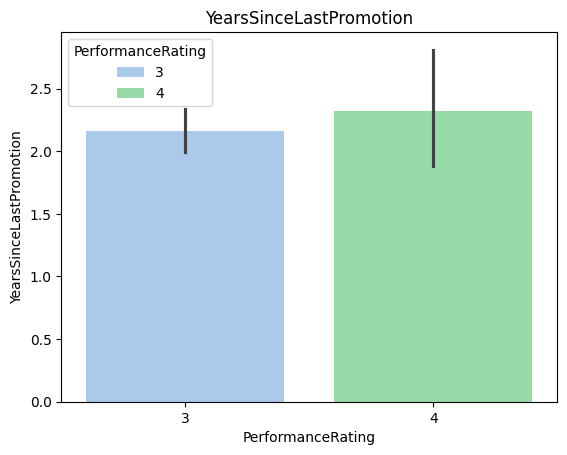

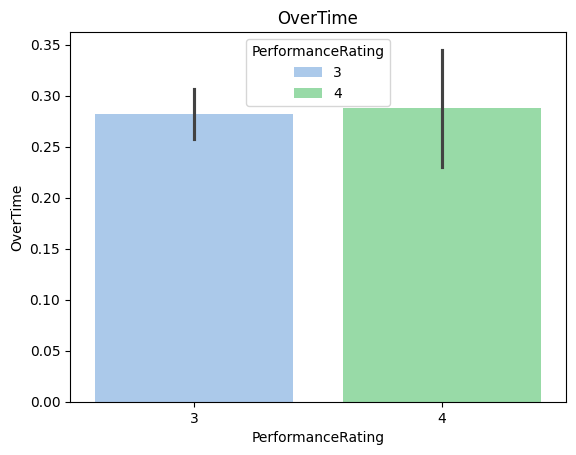

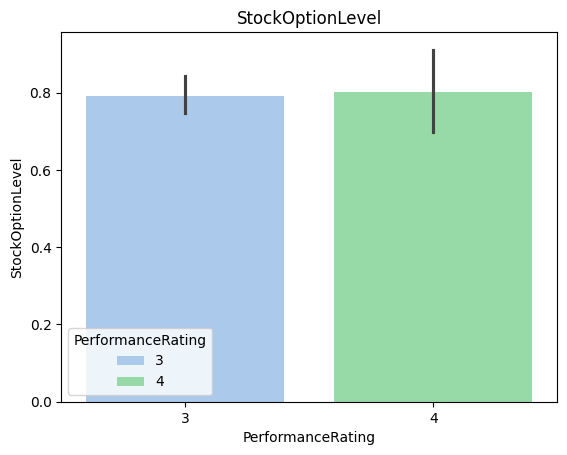

In [23]:
for c_name in target_columns:
    sns.barplot(data=data, x='PerformanceRating', y=c_name, hue="PerformanceRating", palette="pastel6")
    plt.title(c_name)
    plt.show()

### 과제 1-2

1번의 과정을 총 35가지 요인(변수)에 대해 적용하여 살펴보고, 본인이 생각하기에 가장 중요한 요인으로 판단되는 요인을 나름대로의 분석 방법으로 분석하고 결과를 제출해주세요.
1) 주어진 데이터와 도메인 지식으로 나만의 결론을 도출

2) 1번에서 추출한 데이터로, 간단한 스토리라인이 포함된 보고서 형태의 결과물 작성(페이지수 제한 없음)

### 방법
- 상관관계 분석을 통해서 우선적으로 비교적 상관관계가 높은 데이터들을 분류
  - top 5를 추출하고 비교적 의외라고 생각되는 데이터에 대해서 분석 진행
- 상관관계 분석이 불가능한 범주형 데이터들은 각 그룹별 업무 성과가 높은 직원의 비율을 통해서 비교

In [24]:
num_columns2 = data.select_dtypes(include=np.number).columns.tolist()
num_columns3 = [i for i in num_columns2 if i not in exclude_columns]
cat_columns2 = data.select_dtypes(exclude=np.number).columns.tolist()
cat_columns3 = [i for i in cat_columns2 if i not in exclude_columns]

In [25]:
cat_columns3

['Department', 'EducationField', 'JobRole', 'MaritalStatus']

In [26]:
for i in data['Department'].unique():
    high_perform_rate = len(data[(data['Department']==i) & (data['PerformanceRating']==4)])/len(data[data['Department']==i])
    print(f'{i}부서의 비교적 업무성과가 높은 직원의 비율은 {high_perform_rate * 100 : .2f}% 입니다.')

Sales부서의 비교적 업무성과가 높은 직원의 비율은  13.68% 입니다.
Research & Development부서의 비교적 업무성과가 높은 직원의 비율은  16.23% 입니다.
Human Resources부서의 비교적 업무성과가 높은 직원의 비율은  14.29% 입니다.


In [27]:
for i in data['EducationField'].unique():
    high_perform_rate = len(data[(data['EducationField']==i) & (data['PerformanceRating']==4)])/len(data[data['EducationField']==i])
    print(f'{i} 전공의 비교적 업무성과가 높은 직원의 비율은 {high_perform_rate * 100 : .2f}% 입니다.')

Life Sciences 전공의 비교적 업무성과가 높은 직원의 비율은  15.84% 입니다.
Other 전공의 비교적 업무성과가 높은 직원의 비율은  17.07% 입니다.
Medical 전공의 비교적 업무성과가 높은 직원의 비율은  16.16% 입니다.
Marketing 전공의 비교적 업무성과가 높은 직원의 비율은  13.21% 입니다.
Technical Degree 전공의 비교적 업무성과가 높은 직원의 비율은  12.88% 입니다.
Human Resources 전공의 비교적 업무성과가 높은 직원의 비율은  11.11% 입니다.


In [28]:
for i in data['JobRole'].unique():
    high_perform_rate = len(data[(data['JobRole']==i) & (data['PerformanceRating']==4)])/len(data[data['JobRole']==i])
    print(f'{i} 업무 종류의 비교적 업무성과가 높은 직원의 비율은 {high_perform_rate * 100 : .2f}% 입니다.')

Sales Executive 업무 종류의 비교적 업무성과가 높은 직원의 비율은  12.58% 입니다.
Research Scientist 업무 종류의 비교적 업무성과가 높은 직원의 비율은  16.78% 입니다.
Laboratory Technician 업무 종류의 비교적 업무성과가 높은 직원의 비율은  16.22% 입니다.
Manufacturing Director 업무 종류의 비교적 업무성과가 높은 직원의 비율은  18.62% 입니다.
Healthcare Representative 업무 종류의 비교적 업무성과가 높은 직원의 비율은  15.27% 입니다.
Manager 업무 종류의 비교적 업무성과가 높은 직원의 비율은  19.61% 입니다.
Sales Representative 업무 종류의 비교적 업무성과가 높은 직원의 비율은  14.46% 입니다.
Research Director 업무 종류의 비교적 업무성과가 높은 직원의 비율은  10.00% 입니다.
Human Resources 업무 종류의 비교적 업무성과가 높은 직원의 비율은  13.46% 입니다.


In [29]:
for i in data['MaritalStatus'].unique():
    high_perform_rate = len(data[(data['MaritalStatus']==i) & (data['PerformanceRating']==4)])/len(data[data['MaritalStatus']==i])
    print(f'{i} 상태 중 비교적 업무성과가 높은 직원의 비율은 {high_perform_rate * 100 : .2f}% 입니다.')

Single 상태 중 비교적 업무성과가 높은 직원의 비율은  15.32% 입니다.
Married 상태 중 비교적 업무성과가 높은 직원의 비율은  15.75% 입니다.
Divorced 상태 중 비교적 업무성과가 높은 직원의 비율은  14.68% 입니다.


### 범주형 데이터 비교
- 업무 성과가 높은 직원의 비율이 가장 높은 부서는 R&D 부서
- 업무 성과가 높은 직원의 비율이 가장 높은 전공은 기타이고, 다음으로 높은 전공은 의학
- 업무 성과가 높은 직원의 비율이 가장 높은 포지션은 Manager
- 결혼을 한 직원들이 싱글이나 이혼을 한 인원들보다 업무 성과가 높은 직원의 비율이 높음

In [30]:
num_data = data[num_columns3]

In [31]:
corr_test = pd.DataFrame({'Corr':num_data.corr()['YearsAtCompany']})

In [32]:
corr_matrix = pd.DataFrame({'Corr':num_data.corr()['PerformanceRating']})

In [33]:
corr_matrix = corr_matrix.drop('PerformanceRating', axis=0)

In [34]:
corr_matrix.sort_values(by='Corr', ascending=False)

,Corr
PercentSalaryHike,0.773550
YearsInCurrentRole,0.034986
DistanceFromHome,0.027110
YearsWithCurrManager,0.022827
YearsSinceLastPromotion,0.017896
Gender,0.013859
TotalWorkingYears,0.006744
OverTime,0.004369
StockOptionLevel,0.003506
YearsAtCompany,0.003435


In [35]:
# 절대값을 통해 음의 값과 양의 값을 동일하게 비교
abs_corr = corr_matrix.abs()
corr_matrix = corr_matrix[abs_corr['Corr'] >= 0.01]

In [36]:
# 절대값을 활용하여 음의 값과 양의 값을 동일하게 비교
top_5 = list(corr_matrix.abs().sort_values(by='Corr', ascending=False).head(5).index)

In [37]:
top_5

['PercentSalaryHike',
 'YearsInCurrentRole',
 'RelationshipSatisfaction',
 'EnvironmentSatisfaction',
 'JobInvolvement']

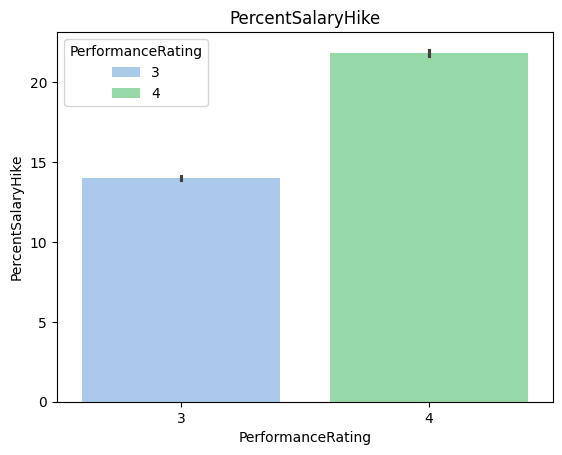

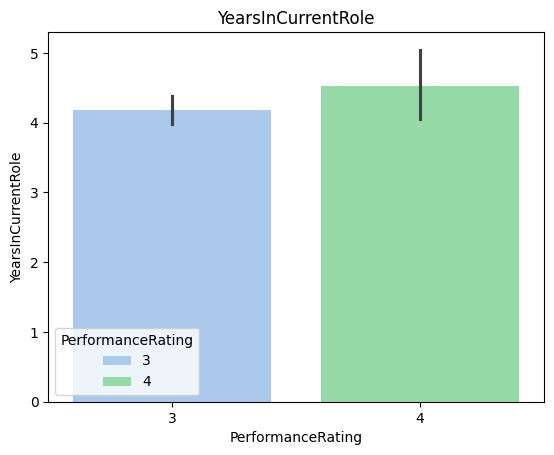

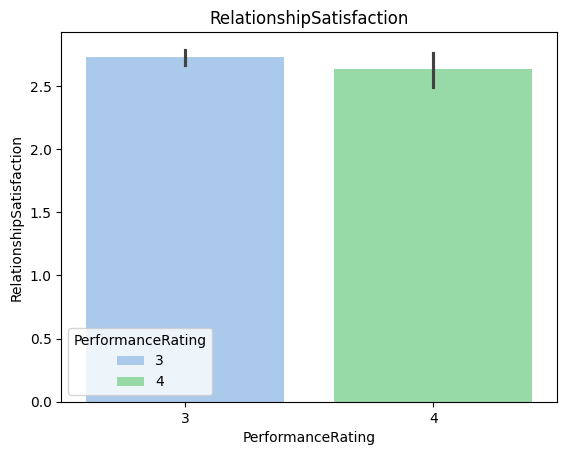

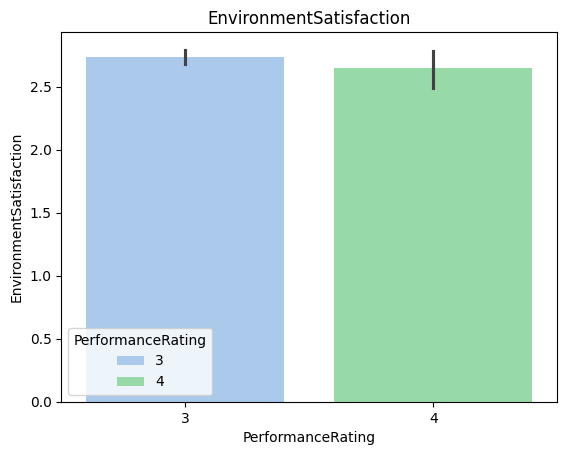

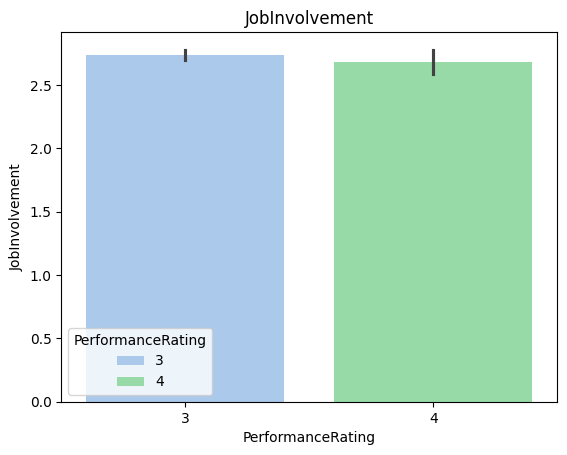

In [38]:
for c_name in top_5:
    sns.barplot(data=data, x='PerformanceRating', y=c_name, hue="PerformanceRating", palette="pastel6")
    plt.title(c_name)
    plt.show()

### 결과 1
- 상관관계가 높게 나온 상위 5개의 요소를 Bar Plot을 통해서 비교
- 상관관계가 가장 높은 급여의 인상분은 다른 요소들과 다르게 매우 큰 평균차이를 보여줌
- 업무 성과가 높은 그룹의 평균적인 현재 역할의 년수가 길었음
- 반대로 업무 성과가 높은 그룹의 평균적인 대인관계 만족도, 업무 환경의 만족도, 업무 참여도가 낮았음
  - 이는 일반적으로 생각하는 업무를 잘하는 직원의 이미지와 매우 다르다고 생각됨

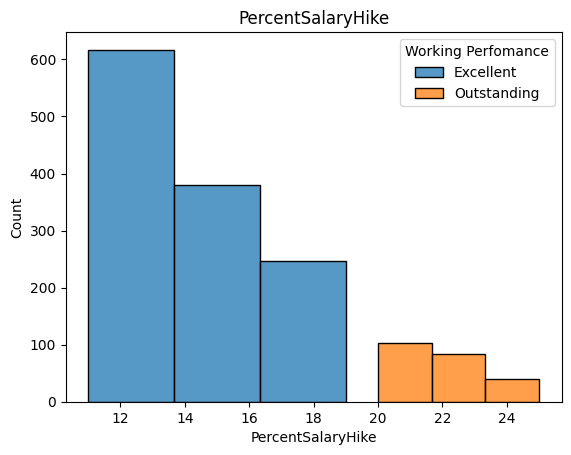

In [39]:
sns.histplot(data=data[data['PerformanceRating']==3], x='PercentSalaryHike', bins=3, label='Excellent')
sns.histplot(data=data[data['PerformanceRating']==4], x='PercentSalaryHike', bins=3, label='Outstanding')
plt.legend(title="Working Perfomance")
plt.title('PercentSalaryHike')
plt.show()

### 급여 증가분 시각화 결과
- 급여의 증가분 백분율이 20을 기준으로 이상은 모두 비교적 좋은 업무 성과를 보여줌
- 개인적인 경험으로는 업무 성과가 좋은 직원들이 급여의 인상분이 높았음
- 위의 경험을 바탕으로 생각했을 때는 급여의 인상분이 높은 직원은 급여의 인상분이 높기 전에도 업무 성과가 높은 직원이었을 가능성이 있음
- 현재의 데이터와 제 경험을 바탕으로 알 수 있는 것을 유추해보면 업무 성과가 높은 직원에게 높은 급여 인상분을 제공하면 높은 업무 성과를 유지할 가능성이 높음
- 따라서 더 정확한 분석을 위해서는 이전의 데이터가 필요함

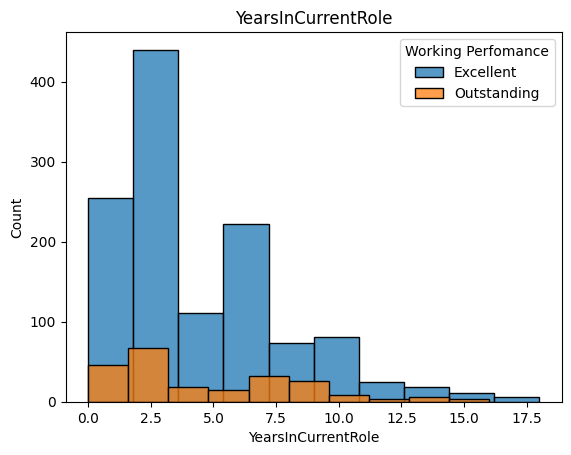

In [40]:
sns.histplot(data=data[data['PerformanceRating']==3], x='YearsInCurrentRole', bins=10, label='Excellent')
sns.histplot(data=data[data['PerformanceRating']==4], x='YearsInCurrentRole', bins=10, label='Outstanding')
plt.legend(title="Working Perfomance")
plt.title('YearsInCurrentRole')
plt.show()

### 현재 역할의 년수 시각화 결과
- 업무 성과가 높은 직원 중 한 역할을 오래 수행한 직원의 비율이 업무 성과가 비교적 낮은 직원들에 비해서 많았음

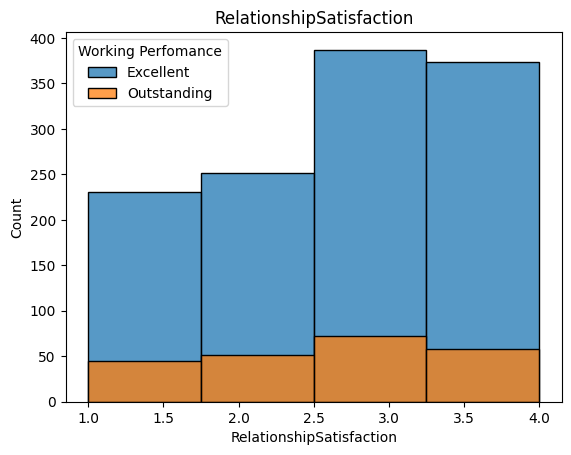

In [41]:
sns.histplot(data=data[data['PerformanceRating']==3], x='RelationshipSatisfaction', bins=4, label='Excellent')
sns.histplot(data=data[data['PerformanceRating']==4], x='RelationshipSatisfaction', bins=4, label='Outstanding')
plt.legend(title="Working Perfomance")
plt.title('RelationshipSatisfaction')
plt.show()

### 관계 만족도 시각화 결과
- 비교적 업무 성과가 낮은 직원들중 매우 만족하는 직원들과 중간인 직원들의 분포는 큰 차이가 있음
- 그러나 업무 성과가 높은 직원들의 경우에는 두 선택지의 차이가 거의 존재하지 않음

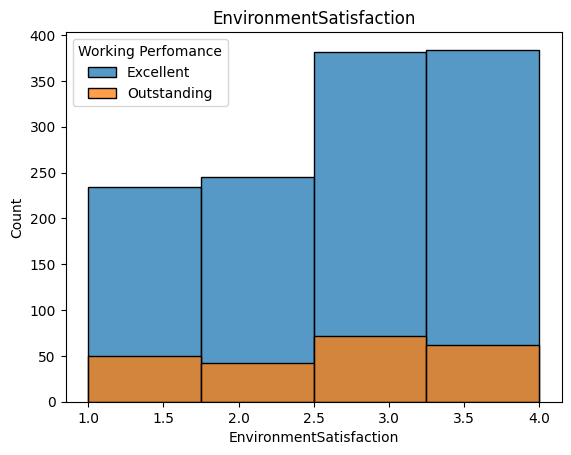

In [42]:
sns.histplot(data=data[data['PerformanceRating']==3], x='EnvironmentSatisfaction', bins=4, label='Excellent')
sns.histplot(data=data[data['PerformanceRating']==4], x='EnvironmentSatisfaction', bins=4, label='Outstanding')
plt.legend(title="Working Perfomance")
plt.title('EnvironmentSatisfaction')
plt.show()

### 업무 환경 만족도 시각화 결과
- 비교적 업무 성과가 낮은 직원들중 매우 만족하는 직원들과 만족하는 직원들의 차이는 적고 중간인 직원들이나 만족하지 못하는 직원들의 분포는 차이가 큼
- 그러나 업무 성과가 높은 직원들의 경우에는 매우 만족하는 직원들이 분포가 만족하는 직원들 보다 적음
- 반면에 매우 만족하는 직원의 분포와 만족하지 못하는 직원의 분포차이가 적음

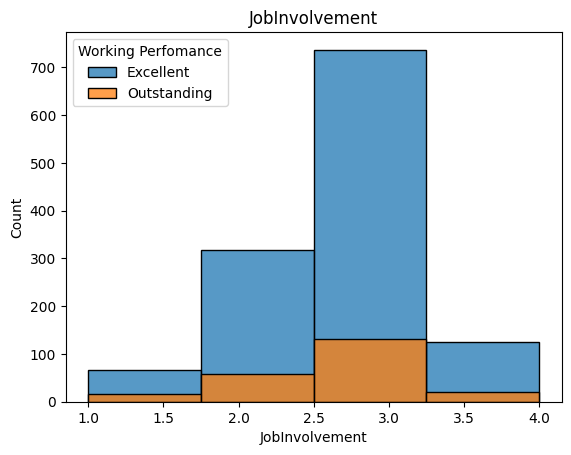

In [43]:
sns.histplot(data=data[data['PerformanceRating']==3], x='JobInvolvement', bins=4, label='Excellent')
sns.histplot(data=data[data['PerformanceRating']==4], x='JobInvolvement', bins=4, label='Outstanding')
plt.legend(title="Working Perfomance")
plt.title('JobInvolvement')
plt.show()

### 업무 참여도 시각화 결과
- 업무성과가 높은 그룹이 업무성과가 낮은 그룹에 비해 참여도가 높은 직원의 비율과 낮은 작원의 비율이 비슷함

### 의외였던 요소들
- 가장의 의외였던 부분들은 교육수준과 직원ID

In [44]:
unexpected = ['Education', 'EmployeeNumber']

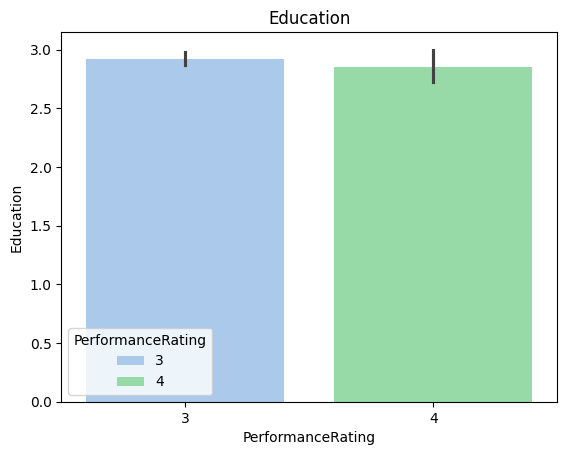

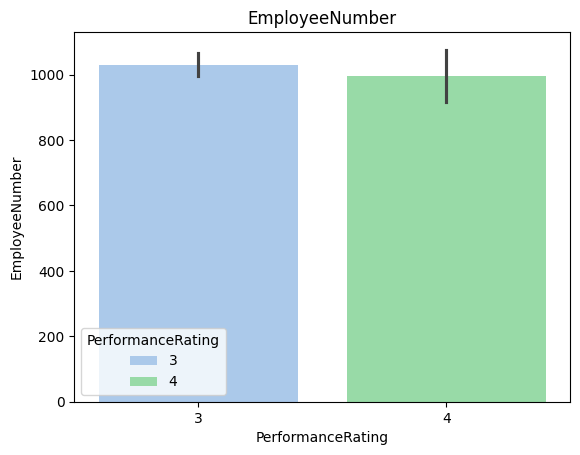

In [45]:
for c_name in unexpected:
    sns.barplot(data=data, x='PerformanceRating', y=c_name, hue="PerformanceRating", palette="pastel6")
    plt.title(c_name)
    plt.show()

### 결과3
- 일반적으로 교육수준이 높은 경우 더 업무를 잘 진행할 것이라 예상
- 그러나 업무 성과가 높은 직원과 비교적 낮은 직원의 평균 교육 수준을 비교해본 결과 업무 성과가 낮은 직원들의 평균 업무 성과가 높았음
- 직원의 ID 값은 업무의 성과와 관련이 없어 보였음
- 실제 분석해본 결과 다른 요소들에 비해서 평균에서 비교적 큰 차이를 보임

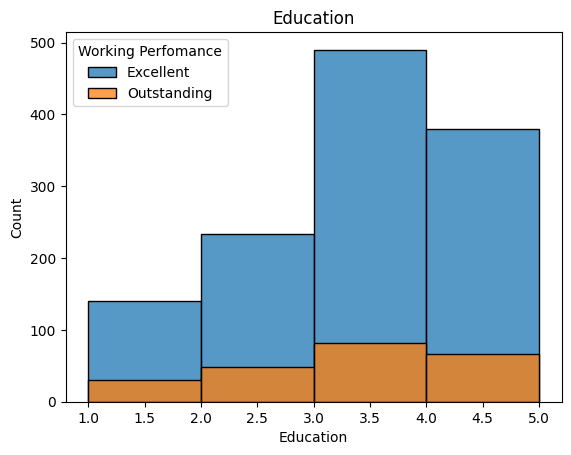

In [46]:
sns.histplot(data=data[data['PerformanceRating']==3], x='Education', bins=4, label='Excellent')
sns.histplot(data=data[data['PerformanceRating']==4], x='Education', bins=4, label='Outstanding')
plt.legend(title="Working Perfomance")
plt.title('Education')
plt.show()

### 교육 수준 시각화 결과
- 비교적 업무성과가 낮은 직원들의 경우 교육수준별 분포의 차이가 더 컸지만 업무 성과가 높은 직원들의 경우 분포 차이가 작았음
- 이에 대한 이유를 생각해보았는데 교육수준이 낮은 직원일 경우 입사를 위해서 해당 직무에 대한 강점을 더 쌓아서 이에 따라 업무 성과가 높을 수 있다는 생각을 함

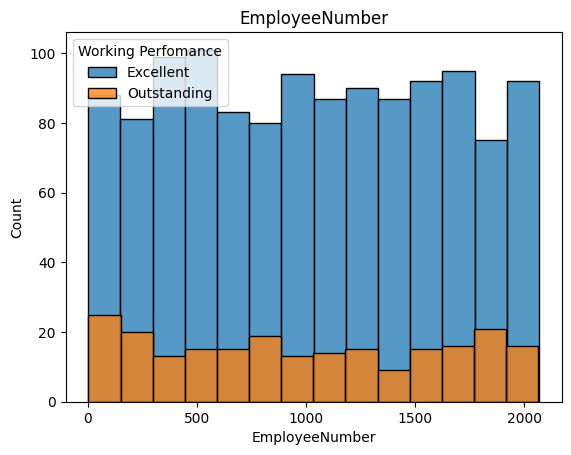

In [47]:
sns.histplot(data=data[data['PerformanceRating']==3], x='EmployeeNumber', bins=14, label='Excellent')
sns.histplot(data=data[data['PerformanceRating']==4], x='EmployeeNumber', bins=14, label='Outstanding')
plt.legend(title="Working Perfomance")
plt.title('EmployeeNumber')
plt.show()

### 직원 ID 시각화 결과
- 대부분의 분포는 양쪽 모두 비슷한 수준을 보이지만 업무 성과가 높은 직원쪽의 직원ID가 낮은 분포가 더 컸음
- 이는 초창기에 입사한 직원이 더 높은 업무 성과를 보일 확률이 있다는 결과로 해설할 수 있음